In [1]:
import pandas as pd
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [47]:
df_5_ate_10 = pd.read_csv("../5_ate_10/analise_geral/analise_geral.csv", dtype=str)
df_10_ate_19 = pd.read_csv("../adolescente/analise_geral/analise_geral.csv", dtype=str)

In [48]:
df_completo = pd.merge(
    df_5_ate_10,
    df_10_ate_19,
    on=['regiao', 'codigo_uf', 'uf', 'codigo_ibge', 'municipio', 'ano'],
    suffixes=('_5_10', '_10_19')
)

In [38]:
df_completo.columns

Index(['Unnamed: 0_5_10', 'regiao', 'codigo_uf', 'uf', 'codigo_ibge',
       'municipio', 'qtd_magreza_acentuada_5_10',
       'perc_magreza_acentuada_5_10', 'qtd_magreza_5_10', 'perc_magreza_5_10',
       'qtd_eutrofia_5_10', 'perc_eutrofia_5_10', 'qtd_sobrepeso_5_10',
       'perc_sobrepeso_5_10', 'qtd_obesidade_5_10', 'perc_obesidade_5_10',
       'qtd_obesidade_grave_5_10', 'perc_obesidade_grave_5_10', 'total_5_10',
       'ano', 'Unnamed: 0_10_19', 'qtd_magreza_acentuada_10_19',
       'perc_magreza_acentuada_10_19', 'qtd_magreza_10_19',
       'perc_magreza_10_19', 'qtd_eutrofia_10_19', 'perc_eutrofia_10_19',
       'qtd_sobrepeso_10_19', 'perc_sobrepeso_10_19', 'qtd_obesidade_10_19',
       'perc_obesidade_10_19', 'qtd_obesidade_grave_10_19',
       'perc_obesidade_grave_10_19', 'total_10_19'],
      dtype='object')

In [52]:
df_final = df_completo[['regiao', 'codigo_uf', 'uf', 'codigo_ibge', 'municipio', 'ano', 'qtd_sobrepeso_5_10', 'qtd_obesidade_5_10', 'qtd_obesidade_grave_5_10', 'total_5_10', 'qtd_sobrepeso_10_19', 'qtd_obesidade_10_19', 'qtd_obesidade_grave_10_19', 'total_10_19']]
df_final

,regiao,codigo_uf,uf,codigo_ibge,municipio,ano,qtd_sobrepeso_5_10,qtd_obesidade_5_10,qtd_obesidade_grave_5_10,total_5_10,qtd_sobrepeso_10_19,qtd_obesidade_10_19,qtd_obesidade_grave_10_19,total_10_19
0,CENTRO-OESTE,53.0,DF,530010.0,BRASILIA,2014,1.957,941.0,540.0,14.719,2.486,900.0,163.0,15.530
1,TOTAL ESTADO DISTRITO FEDERAL,NaN,NaN,NaN,NaN,2014,1.957,941.0,540.0,14.719,2.486,900.0,163.0,15.530
2,CENTRO-OESTE,52.0,GO,520005.0,ABADIA DE GOIAS,2014,29.0,21.0,17.0,190,49.0,13.0,4.0,253
3,CENTRO-OESTE,52.0,GO,520010.0,ABADIANIA,2014,34.0,14.0,17.0,218,48.0,13.0,4.0,289
4,CENTRO-OESTE,52.0,GO,520013.0,ACREUNA,2014,52.0,28.0,22.0,402,105.0,43.0,11.0,608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61639,SUL,42.0,SC,421970.0,XAXIM,2024,243.0,131.0,58.0,1.488,346,220.0,56.0,1.763
61640,SUL,42.0,SC,421985.0,ZORTEA,2024,52.0,19.0,15.0,302,76,39.0,16.0,466
61641,TOTAL ESTADO SANTA CATARINA,NaN,NaN,NaN,NaN,2024,43.445,24.453,13.935,257.701,76.522,44.4,12.956,386.189
61642,TOTAL REGIÃO SUL,NaN,NaN,NaN,NaN,2024,157.77,94.058,59.936,914.355,249.377,153.24,49.773,1.218.009


In [55]:
import pandas as pd

# Filtra TOTAL BRASIL
df_brasil = df_final[df_final['regiao'].str.startswith(('TOTAL BRASIL'), na=False)]

# Colunas para tratar
colunas_para_converter = [
    'qtd_sobrepeso_5_10', 'qtd_sobrepeso_10_19',
    'qtd_obesidade_5_10', 'qtd_obesidade_10_19',
    'qtd_obesidade_grave_5_10', 'qtd_obesidade_grave_10_19',
    'total_5_10', 'total_10_19'
]

# Função para corrigir cada célula
def corrigir_numero(valor):
    if pd.isna(valor):
        return valor
    valor = str(valor).strip()  # tira espaços
    # Se tiver mais de 1 ponto, é separador de milhar: remove todos os pontos
    if valor.count('.') > 1:
        valor_corrigido = valor.replace('.', '')
        return pd.to_numeric(valor_corrigido, errors='coerce')
    # Se tiver só 1 ponto, é decimal quebrado: multiplica por 1000
    elif valor.count('.') == 1:
        try:
            valor_corrigido = float(valor) * 1000
            return int(valor_corrigido)
        except:
            return pd.NA
    else:
        # Não tem ponto? Converte normal
        return pd.to_numeric(valor, errors='coerce')

# Aplica correção em cada coluna
for coluna in colunas_para_converter:
    df_brasil[coluna] = df_brasil[coluna].apply(corrigir_numero)

# Resultado final
df_brasil


,regiao,codigo_uf,uf,codigo_ibge,municipio,ano,qtd_sobrepeso_5_10,qtd_obesidade_5_10,qtd_obesidade_grave_5_10,total_5_10,qtd_sobrepeso_10_19,qtd_obesidade_10_19,qtd_obesidade_grave_10_19,total_10_19
5603,TOTAL BRASIL,NaN,NaN,NaN,NaN,2014,527082,259634,175151,3469049,713307,232023,48355,4310428
11207,TOTAL BRASIL,NaN,NaN,NaN,NaN,2015,634381,324769,197617,4025308,844616,309213,65191,4888991
16811,TOTAL BRASIL,NaN,NaN,NaN,NaN,2016,592010,311516,200524,3779681,823149,310902,73218,4697161
22415,TOTAL BRASIL,NaN,NaN,NaN,NaN,2017,611277,325959,198978,3937627,850860,324266,68880,4787260
28019,TOTAL BRASIL,NaN,NaN,NaN,NaN,2018,690367,363668,203735,4290916,988246,404164,84228,5300728
33623,TOTAL BRASIL,NaN,NaN,NaN,NaN,2019,671463,368813,222949,4487771,933977,404723,91926,5116865
39227,TOTAL BRASIL,NaN,NaN,NaN,NaN,2020,373246,222724,148199,2341747,615381,294206,74166,3081455
44831,TOTAL BRASIL,NaN,NaN,NaN,NaN,2021,552331,356554,254681,3426149,837840,429778,121688,4241264
50435,TOTAL BRASIL,NaN,NaN,NaN,NaN,2022,806800,498045,329227,5227242,1212657,625388,167545,6428226
56039,TOTAL BRASIL,NaN,NaN,NaN,NaN,2023,888969,523961,329443,5942998,1364029,723789,198146,7332450


In [56]:
df_brasil['qtd_sobrepeso'] = df_brasil['qtd_sobrepeso_5_10'] + df_brasil['qtd_sobrepeso_10_19']
df_brasil['qtd_obesidade'] = df_brasil['qtd_obesidade_5_10'] + df_brasil['qtd_obesidade_10_19']
df_brasil['qtd_obesidade_grave'] = df_brasil['qtd_obesidade_grave_5_10'] + df_brasil['qtd_obesidade_grave_10_19']
df_brasil['total_criancas'] = df_brasil['total_5_10'] + df_brasil['total_10_19']

df_agrupado = df_brasil.groupby(
    ['regiao', 'ano'],
    as_index=False
)[['qtd_sobrepeso', 'qtd_obesidade', 'qtd_obesidade_grave', 'total_criancas']].sum()


In [57]:
df_agrupado['total_excesso_peso'] = df_agrupado['qtd_sobrepeso'] + df_agrupado['qtd_obesidade'] + df_agrupado['qtd_obesidade_grave']
df_agrupado

,regiao,ano,qtd_sobrepeso,qtd_obesidade,qtd_obesidade_grave,total_criancas,total_excesso_peso
0,TOTAL BRASIL,2014,1240389,491657,223506,7779477,1955552
1,TOTAL BRASIL,2015,1478997,633982,262808,8914299,2375787
2,TOTAL BRASIL,2016,1415159,622418,273742,8476842,2311319
3,TOTAL BRASIL,2017,1462137,650225,267858,8724887,2380220
4,TOTAL BRASIL,2018,1678613,767832,287963,9591644,2734408
5,TOTAL BRASIL,2019,1605440,773536,314875,9604636,2693851
6,TOTAL BRASIL,2020,988627,516930,222365,5423202,1727922
7,TOTAL BRASIL,2021,1390171,786332,376369,7667413,2552872
8,TOTAL BRASIL,2022,2019457,1123433,496772,11655468,3639662
9,TOTAL BRASIL,2023,2252998,1247750,527589,13275448,4028337


In [58]:
df_regioes = df_final[df_final['regiao'].str.startswith(('TOTAL REGIÃO', 'TOTAL BRASIL'), na=False)]
mapeamento = {
    'TOTAL REGIÃO CENTRO-OESTE': 'Centro-oeste',
    'TOTAL REGIÃO NORDESTE': 'Nordeste',
    'TOTAL REGIÃO NORTE': 'Norte',
    'TOTAL REGIÃO SUDESTE': 'Sudeste',
    'TOTAL REGIÃO SUL': 'Sul',
    'TOTAL BRASIL': 'Total Brasil'
}

df_regioes['regiao'] = df_regioes['regiao'].replace(mapeamento)

In [59]:
colunas_para_converter = [
    'qtd_sobrepeso_5_10', 'qtd_sobrepeso_10_19',
    'qtd_obesidade_5_10', 'qtd_obesidade_10_19',
    'qtd_obesidade_grave_5_10', 'qtd_obesidade_grave_10_19',
    'total_5_10', 'total_10_19'
]

# Remove espaços, quebras de linha e outros caracteres invisíveis
df_regioes[colunas_para_converter] = (
    df_regioes[colunas_para_converter]
    .apply(lambda col: col.astype(str).str.replace(r'\s+', '', regex=True))  # remove todos os espaços invisíveis
    .replace(r'\.', '', regex=True)  # remove pontos de milhar
    .apply(pd.to_numeric, errors='coerce')  # converte para número
)


In [60]:
df_regioes['qtd_sobrepeso'] = df_regioes['qtd_sobrepeso_5_10'] + df_regioes['qtd_sobrepeso_10_19']
df_regioes['qtd_obesidade'] = df_regioes['qtd_obesidade_5_10'] + df_regioes['qtd_obesidade_10_19']
df_regioes['qtd_obesidade_grave'] = df_regioes['qtd_obesidade_grave_5_10'] + df_regioes['qtd_obesidade_grave_10_19']
df_regioes['total_criancas'] = df_regioes['total_5_10'] + df_regioes['total_10_19']

df_agrupado = df_regioes.groupby(
    ['regiao', 'ano'],
    as_index=False
)[['qtd_sobrepeso', 'qtd_obesidade', 'qtd_obesidade_grave', 'total_criancas']].sum()


In [61]:
df_agrupado['total_excesso_peso'] = df_agrupado['qtd_sobrepeso'] + df_agrupado['qtd_obesidade'] + df_agrupado['qtd_obesidade_grave']
df_agrupado['perc_excesso_peso'] = (df_agrupado['total_excesso_peso'] / df_agrupado['total_criancas']) *100

In [62]:
df_agrupado

,regiao,ano,qtd_sobrepeso,qtd_obesidade,qtd_obesidade_grave,total_criancas,total_excesso_peso,perc_excesso_peso
0,Centro-oeste,2014,71558,29282,10325,429136,111165,25.904375
1,Centro-oeste,2015,92404,40534,18372,541360,151310,27.949978
2,Centro-oeste,2016,85220,38152,18004,495668,141376,28.522317
3,Centro-oeste,2017,87884,39837,15235,510313,142956,28.013396
4,Centro-oeste,2018,50121,49772,17375,591130,117268,19.837938
...,...,...,...,...,...,...,...,...
61,Total Brasil,2020,988627,516930,222365,5423202,1727922,31.861657
62,Total Brasil,2021,636115,786332,376369,7667413,1798816,23.460534
63,Total Brasil,2022,1220725,1123433,496772,11655468,2840930,24.374225
64,Total Brasil,2023,2252998,1247750,527589,13275448,4028337,30.344264


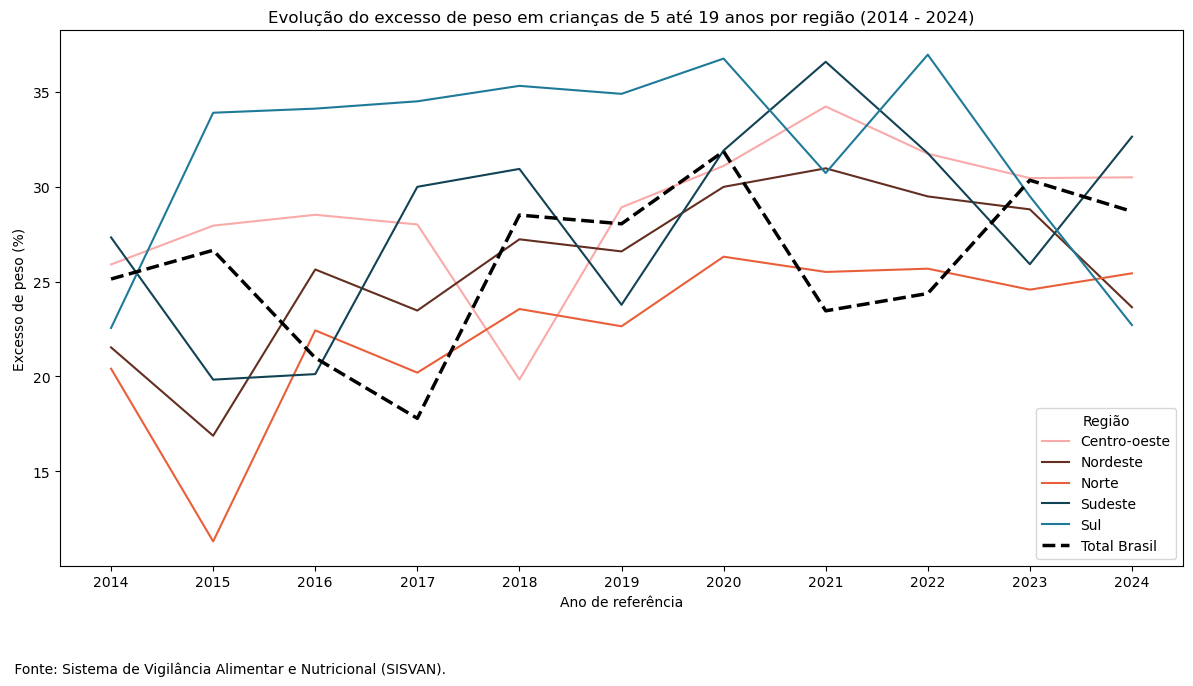

In [63]:
plt.figure(figsize=(12, 7))  
cat_colors = ["#F9AAA9", "#632F21", "#E95F3A", "#114354", "#1F7A99"]
sns.set_palette(cat_colors)

regioes = df_agrupado['regiao'].unique()

for regiao in regioes:
    data = df_agrupado[df_agrupado['regiao'] == regiao]
    if regiao == "Total Brasil":
        sns.lineplot(data=data, x='ano', y='perc_excesso_peso', label=regiao,linewidth=2.5, linestyle='--', color='black')  
    else:
        sns.lineplot(data=data, x='ano', y='perc_excesso_peso', label=regiao,linewidth=1.5)

plt.title('Evolução do excesso de peso em crianças de 5 até 19 anos por região (2014 - 2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.legend(title='Região')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()
